In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data_full.csv")

In [3]:
df.shape

(15000, 12)

In [4]:
df.head()

,oos_val/0,oos_val/1,val/0,val/1,train/0,train/1,oos_test/0,oos_test/1,test/0,test/1,oos_train/0,oos_train/1
0,set a warning for when my bank account starts ...,oos,"in spanish, meet me tomorrow is said how",translate,what expression would i use to say i love you ...,translate,how much has the dow changed today,oos,how would you say fly in italian,translate,how much is an overdraft fee for bank,oos
1,a show on broadway,oos,"in french, how do i say, see you later",translate,can you tell me how to say 'i do not speak muc...,translate,how many prime numbers are there between 0 and...,oos,what's the spanish word for pasta,translate,why are exponents preformed before multiplicat...,oos
2,who has the best record in the nfl,oos,how do you say hello in japanese,translate,"what is the equivalent of, 'life is good' in f...",translate,can you tell me how to solve simple algebraic ...,oos,how would they say butter in zambia,translate,what size wipers does this car take,oos
3,how do i find the area of a circle,oos,how do i ask about the weather in chinese,translate,"tell me how to say, 'it is a beautiful morning...",translate,can you dim the brightness of my screen,oos,how do you say fast in spanish,translate,where is the dipstick,oos
4,how many onions do i have on hand,oos,"how can i say ""cancel my order"" in french",translate,"if i were mongolian, how would i say that i am...",translate,what is the account number to the internet ser...,oos,what's the word for trees in norway,translate,how much is 1 share of aapl,oos


In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [6]:
df.isna().sum()

oos_val/0      14900
oos_val/1      14900
val/0          12000
val/1          12000
train/0            0
train/1            0
oos_test/0     14000
oos_test/1     14000
test/0         10500
test/1         10500
oos_train/0    14900
oos_train/1    14900
dtype: int64

In [7]:
df.shape

(15000, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   oos_val/0    100 non-null    object
 1   oos_val/1    100 non-null    object
 2   val/0        3000 non-null   object
 3   val/1        3000 non-null   object
 4   train/0      15000 non-null  object
 5   train/1      15000 non-null  object
 6   oos_test/0   1000 non-null   object
 7   oos_test/1   1000 non-null   object
 8   test/0       4500 non-null   object
 9   test/1       4500 non-null   object
 10  oos_train/0  100 non-null    object
 11  oos_train/1  100 non-null    object
dtypes: object(12)
memory usage: 1.4+ MB


In [9]:
df.tail()

,oos_val/0,oos_val/1,val/0,val/1,train/0,train/1,oos_test/0,oos_test/1,test/0,test/1,oos_train/0,oos_train/1
14995,NaN,NaN,NaN,NaN,can you explain why my card was declined,card_declined,NaN,NaN,NaN,NaN,NaN,NaN
14996,NaN,NaN,NaN,NaN,how come starbucks declined my card when i tri...,card_declined,NaN,NaN,NaN,NaN,NaN,NaN
14997,NaN,NaN,NaN,NaN,how come my card was not accepted yesterday,card_declined,NaN,NaN,NaN,NaN,NaN,NaN
14998,NaN,NaN,NaN,NaN,find out what happened to make my card get dec...,card_declined,NaN,NaN,NaN,NaN,NaN,NaN
14999,NaN,NaN,NaN,NaN,why was my card declined at safeway,card_declined,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sns.histplot(x="train/0",data=df, hue="train/1")

In [10]:
df["train/1"].value_counts()

translate          100
order_status       100
goodbye            100
account_blocked    100
what_song          100
                  ... 
reminder           100
change_speed       100
tire_pressure      100
no                 100
card_declined      100
Name: train/1, Length: 150, dtype: int64

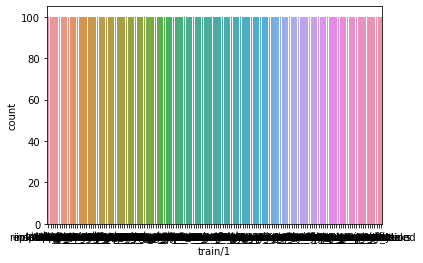

In [11]:
sns.countplot(x="train/1", data=df);

In [12]:
df.value_counts("train/1")

train/1
accept_reservations          100
reminder                     100
repeat                       100
replacement_card_duration    100
report_fraud                 100
                            ... 
greeting                     100
how_busy                     100
how_old_are_you              100
improve_credit_score         100
yes                          100
Length: 150, dtype: int64

In [13]:
df.value_counts("train/0")

train/0
"can u set a timer for 5 minutes                    1
set a reminder to go grocery shopping               1
set a reminder for me to call my brother at 8 pm    1
set a reminder for me to do this in a bit           1
set a reminder for me to take my meds               1
                                                   ..
how much pressure is in my tires                    1
how much pto do i have                              1
how much pto do i have left                         1
how much pto do i have used up                      1
youre a doll                                        1
Length: 15000, dtype: int64

In [14]:
import scipy
import sklearn
from collections import Counter

In [15]:
Counter(df["train/1"])

Counter({'translate': 100,
         'transfer': 100,
         'timer': 100,
         'definition': 100,
         'meaning_of_life': 100,
         'insurance_change': 100,
         'find_phone': 100,
         'travel_alert': 100,
         'pto_request': 100,
         'improve_credit_score': 100,
         'fun_fact': 100,
         'change_language': 100,
         'payday': 100,
         'replacement_card_duration': 100,
         'time': 100,
         'application_status': 100,
         'flight_status': 100,
         'flip_coin': 100,
         'change_user_name': 100,
         'where_are_you_from': 100,
         'shopping_list_update': 100,
         'what_can_i_ask_you': 100,
         'maybe': 100,
         'oil_change_how': 100,
         'restaurant_reservation': 100,
         'balance': 100,
         'confirm_reservation': 100,
         'freeze_account': 100,
         'rollover_401k': 100,
         'who_made_you': 100,
         'distance': 100,
         'user_name': 100,
         'timez

In [16]:
import ktrain
from ktrain import text

In [17]:
df.groupby("train/1").describe()

oos_val/0                  oos_val/1                   \
                        count unique  top freq     count unique  top freq   
train/1                                                                     
accept_reservations         0      0  NaN  NaN         0      0  NaN  NaN   
account_blocked             0      0  NaN  NaN         0      0  NaN  NaN   
alarm                       0      0  NaN  NaN         0      0  NaN  NaN   
application_status          0      0  NaN  NaN         0      0  NaN  NaN   
apr                         0      0  NaN  NaN         0      0  NaN  NaN   
...                       ...    ...  ...  ...       ...    ...  ...  ...   
where_are_you_from          0      0  NaN  NaN         0      0  NaN  NaN   
whisper_mode                0      0  NaN  NaN         0      0  NaN  NaN   
who_do_you_work_for         0      0  NaN  NaN         0      0  NaN  NaN   
who_made_you                0      0  NaN  NaN         0      0  NaN  NaN   
yes                         0      0  NaN  NaN         0      0  NaN  NaN   

                    val/0         ...           test/1      oos_train/0  \
                    count unique  ...              top freq       count   
train/1                           ...                                     
accept_reservations     0      0  ...              NaN  NaN           0   
account_blocked         0      0  ...              NaN  NaN           0   
alarm                   0      0  ...              NaN  NaN           0   
application_status    100    100  ...         reminder   30           0   
apr                     0      0  ...              NaN  NaN           0   
...                   ...    ...  ...              ...  ...         ...   
where_are_you_from    100    100  ...      sync_device   30           0   
whisper_mode            0      0  ...              NaN  NaN           0   
who_do_you_work_for     0      0  ...              NaN  NaN           0   
who_made_you          100    100  ...  account_blocked   30           0   
yes                     0      0  ...              NaN  NaN           0   

                                     oos_train/1                   
                    unique  top freq       count unique  top freq  
train/1                                                            
accept_reservations      0  NaN  NaN           0      0  NaN  NaN  
account_blocked          0  NaN  NaN           0      0  NaN  NaN  
alarm                    0  NaN  NaN           0      0  NaN  NaN  
application_status       0  NaN  NaN           0      0  NaN  NaN  
apr                      0  NaN  NaN           0      0  NaN  NaN  
...                    ...  ...  ...         ...    ...  ...  ...  
where_are_you_from       0  NaN  NaN           0      0  NaN  NaN  
whisper_mode             0  NaN  NaN           0      0  NaN  NaN  
who_do_you_work_for      0  NaN  NaN           0      0  NaN  NaN  
who_made_you             0  NaN  NaN           0      0  NaN  NaN  
yes                      0  NaN  NaN           0      0  NaN  NaN  

[150 rows x 44 columns]

In [18]:
text = df['train/0'].values.tolist()
intent = df['train/1'].values.tolist()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text, intent, test_size=.2)

In [20]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [21]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 8
	95percentile : 14
	99percentile : 18


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 8
	95percentile : 14
	99percentile : 17


In [22]:
model = t.get_classifier()

In [23]:
learn = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6) 

In [ ]:
learn.lr_find(show_plot=True, max_epochs=1)

simulating training for different learning rates... this may take a few moments...
 113/2000 [>.............................] - ETA: 5:07:12 - loss: 5.0524 - accuracy: 0.0000e+00

In [25]:
learn.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
2000/2000 [==============================] - 19561s 10s/step - loss: 4.4362 - accuracy: 0.2041 - val_loss: 3.2652 - val_accuracy: 0.6763
Epoch 2/3
2000/2000 [==============================] - 19563s 10s/step - loss: 2.0519 - accuracy: 0.8213 - val_loss: 0.9290 - val_accuracy: 0.9347
Epoch 3/3
2000/2000 [==============================] - 19527s 10s/step - loss: 0.6647 - accuracy: 0.9713 - val_loss: 0.5053 - val_accuracy: 0.9650


In [27]:
learn.validate(val_data=(val))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      0.95      0.95        19
           2       0.95      0.95      0.95        21
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        17
           5       1.00      0.91      0.95        23
           6       1.00      1.00      1.00        15
           7       0.86      0.95      0.90        19
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       0.92      1.00      0.96        23
          11       1.00      0.89      0.94        28
          12       0.95      0.95      0.95        20
          13       1.00      0.94      0.97        17
          14       0.96      1.00      0.98        23
          15       0.94      1.00      0.97        29
          16       1.00      1.00      1.00        23
          17       0.96    

array([[19,  0,  0, ...,  0,  0,  0],
       [ 0, 18,  0, ...,  0,  0,  0],
       [ 0,  0, 20, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 15,  2,  0],
       [ 0,  0,  0, ...,  0, 17,  0],
       [ 0,  0,  0, ...,  0,  0, 21]], dtype=int64)